3171
3264
..@@..**....@@.....**....@@........WordCloud for Fake Text.....@@.....**...@@....**....@@......**.....






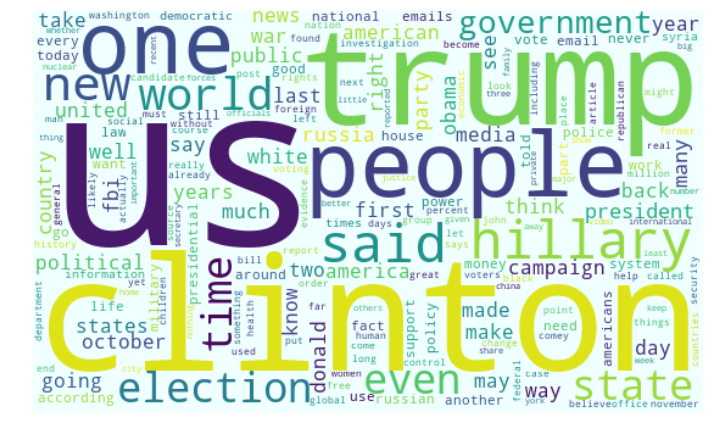

...@@...**..@@...**...@@.....**...@@....**...Wordcloud for Real Text...**...@@....**.....@@.....**....@@...**....






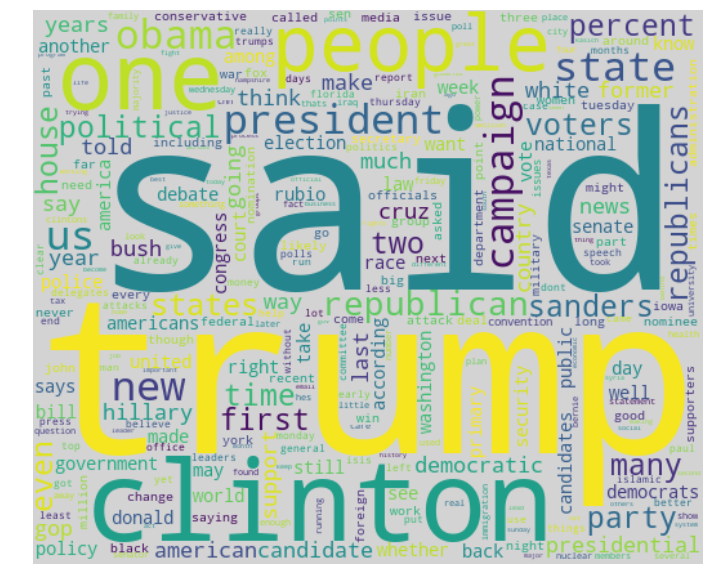



......................Spliting Dataset into training and testing....................


Accuracy_score:  0.9126984126984127
Hi Dhanu!

 Please Write some text to find that this text is Fake or Real :

WHITE PLAINS, N.Y. â€” Not to be outdone by her Republican rival, Hillary Clinton fired off a series of early-morning messages Saturday Â on Twitter.  Only the tweets sent over the Democratic presidential nomineeâ€™s account dealt with a very different subject matter than those blasted about a former beauty-pageant winner by Donald Trump 24 hours before.  [Trump under fire after sending nasty tweets about â€˜disgustingâ€™ ex-Miss Universe]  Clinton instead focused on national service, a subject to which she had devoted a speech in Florida on Friday.  â€œIt's 3:20am. As good a time as any to tweet about national service,â€ said the first one, coming at the same time that Trump started his storm of disparaging tweets about former Miss Universe Alicia Machado.  The next Clinton tweet borro

,label,clean_text
0,0,daniel greenfield shillman journalism fellow f...
1,0,google pinterest digg linkedin reddit stumbleu...
2,1,us secretary state john f kerry said monday st...
3,0,kaydee king kaydeeking november the l...
4,1,its primary day new york frontrunners hillary ...
5,0,i m immigrant grandparents more years ago a...
6,0,share this baylee luciani left screenshot bayl...
7,1,a czech stockbroker saved jewish children ...
8,1,hillary clinton donald trump made inaccurate c...
9,1,iranian negotiators reportedly made lastditch ...


In [226]:
import pandas as pd
text_data=pd.read_csv(r"D:\Users\1741710\MY_DOWNLOADS\news.csv",usecols=['text','label'])
def text_classification_by_sajid(read_data_frame):
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer 
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import SGDClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.pipeline import Pipeline
    def data_preprocessing_for_sajid(text):
        import pandas as pd
        import numpy as np
        import wordcloud
        import re
        import string
        from wordcloud import STOPWORDS
        import nltk
        from nltk.corpus import stopwords
        pd.set_option("display.max_rows",1000000)
        pd.set_option('display.max_columns', 10000)
        pd.set_option('display.width', 10000)
        punc_sajid = set(string.punctuation)
        text = ''.join(word for word in text if word not in punc_sajid)
        stop_words=set(stopwords.words('english'))
        text=' '.join(word for word in text.split() if word not in stop_words)
        text = re.sub(r'[^a-zA-Z\']', ' ', text)
        text = re.sub(r'[^\x00-\x7F]+', '', text)#remove unicode only-----------dnu
        text = text.lower()
        return text
    data_preprocessing_for_sajid(read_data_frame.text)
    read_data_frame['clean_text']=read_data_frame.text.apply(lambda x:data_preprocessing_for_sajid(x))
    read_data_frame.label=read_data_frame.label.replace(['FAKE','REAL'],[0,1])
    read_data_frame=read_data_frame.drop(['text'],1)
    pd.set_option("display.max_rows",1000000)
    
    read_data_sorted=read_data_frame.sort_values(by='label',ascending=False)
    read_data_sorted=read_data_sorted.reset_index()
    read_data_sorted=read_data_sorted.drop(['index'],1)
    data_Real=read_data_sorted.iloc[:3171]
    data_Fake=read_data_sorted.iloc[3071:]
    print(len(data_Real))
    print(len(data_Fake))
    def counting_freq(text):
        w_list = []
        for words in text.split():
            w_list.extend(words)
        w_freq = pd.Series(w_list).value_counts()
        return w_freq
    from wordcloud import STOPWORDS
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    print("..@@..**....@@.....**....@@........WordCloud for Fake Text.....@@.....**...@@....**....@@......**.....\n\n\n\n")
    text = data_Fake.clean_text.apply(lambda x: data_preprocessing_for_sajid(x))
    word_freq = counting_freq(text.str)*100
    word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
    wc = WordCloud(width=550, height=330, max_words=200, background_color='Azure').generate_from_frequencies(word_freq)
    plt.figure(figsize=(12, 14))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    print("...@@...**..@@...**...@@.....**...@@....**...Wordcloud for Real Text...**...@@....**.....@@.....**....@@...**....\n\n\n\n")
    text = data_Real.clean_text.apply(lambda x: data_preprocessing_for_sajid(x))
    word_freq = counting_freq(text.str)*100
    word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
    wc = WordCloud(width=520, height=430, max_words=283, background_color='LightGray').generate_from_frequencies(word_freq)
    plt.figure(figsize=(12, 14))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    print('\n\n......................Spliting Dataset into training and testing....................\n\n')
    read_data_frame.to_csv("news_up.csv",index=False)
    text_up=pd.read_csv('news_up.csv')
    text_up=text_up.dropna()
    x_train,x_test,y_train,y_test=train_test_split(text_up.clean_text,text_up.label,test_size=0.2,random_state=40)
    model_st = make_pipeline(CountVectorizer(),MultinomialNB())
    model_st.fit(x_train,y_train)
    label=model_st.predict(x_test)
    print("Accuracy_score: ",accuracy_score(y_test,label))
    import numpy as np
#     text_up.label=text_up.label.replace([0,1],['Fake','Real'])
    def predict_car(s,train=text_up,model=model_st):
        pred=model.predict([s])
        print("\nCongratulations Sajid you find that this text is belongs to :",train.label[pred[:1]],"\n)
        print("Please accept only first index number Example 0 0 \n First value is the answer:")
        print("Note:\n 1 means Text is related to Real Text \n 0 means text  is related to Fake.")
        type(train.label[pred])
        return train.label[pred]
    my_text_data=str(input("Hi dear Sajid !\n\n Please Write some text to find that this text is Fake or Real :\n\n"))
    type(my_text_data)
    predict_car(my_text_data)
    return read_data_frame.head(10)
pd.set_option("display.max_rows",1000000)
text_classification_by_sajid(text_data)    